# Facial Emotion CNN Activation Maps Visualization

This notebook demonstrates how to visualize activation maps from a CNN trained for facial emotion recognition.

In [1]:
# Notenook to visualize the activation maps of a pre-trained model on a sample image.
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import random

# Import our activation map visualizer
from visualize_activations import ActivationMapVisualizer

In [2]:
# Initialize the model
model_path = "model/emotion_model.pth"  # Change if your model is elsewhere
visualizer = ActivationMapVisualizer(model_path=model_path if os.path.exists(model_path) else None)

# Create output directory
output_dir = "outputs"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

e:\Project-1\kitkat\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\Project-1\kitkat\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


No model loaded. Using the model with pre-trained ImageNet weights.


Found sample image: train\happy\Training_10019449.jpg


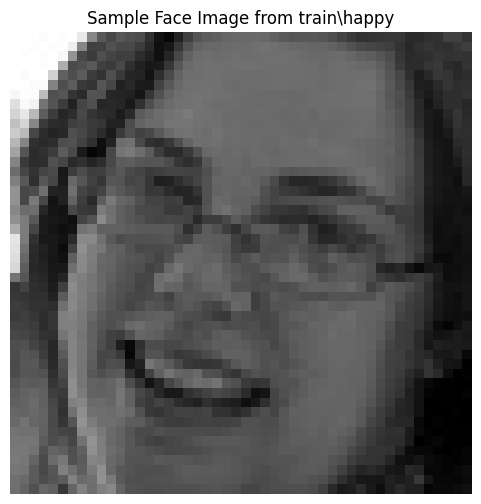

In [3]:
# Load a sample image
# First try to find a real sample from the dataset
sample_found = False
emotions = ['happy', 'angry', 'disgust', 'fear', 'neutral', 'sad', 'surprise']

# Try to find a sample in the train directory
for emotion in emotions:
    emotion_dir = os.path.join('train', emotion)
    if os.path.exists(emotion_dir):
        img_files = [f for f in os.listdir(emotion_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        if img_files:
            img_path = os.path.join(emotion_dir, img_files[0])
            sample_found = True
            print(f"Found sample image: {img_path}")
            break

# If no sample found in train, check test directory
if not sample_found:
    for emotion in emotions:
        emotion_dir = os.path.join('test', emotion)
        if os.path.exists(emotion_dir):
            img_files = [f for f in os.listdir(emotion_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            if img_files:
                img_path = os.path.join(emotion_dir, img_files[0])
                sample_found = True
                print(f"Found sample image: {img_path}")
                break

# If still no sample found
if not sample_found:
    img_path = "data/sample_face.jpg"
    print("No sample image found in dataset. Using default path which may not exist.")

# Display the original image
if os.path.exists(img_path):
    img = Image.open(img_path).convert("RGB")
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Sample Face Image from {os.path.dirname(img_path)}")
    plt.axis("off")
    plt.show()
else:
    print(f"Image not found at {img_path}. Please update the img_path.")

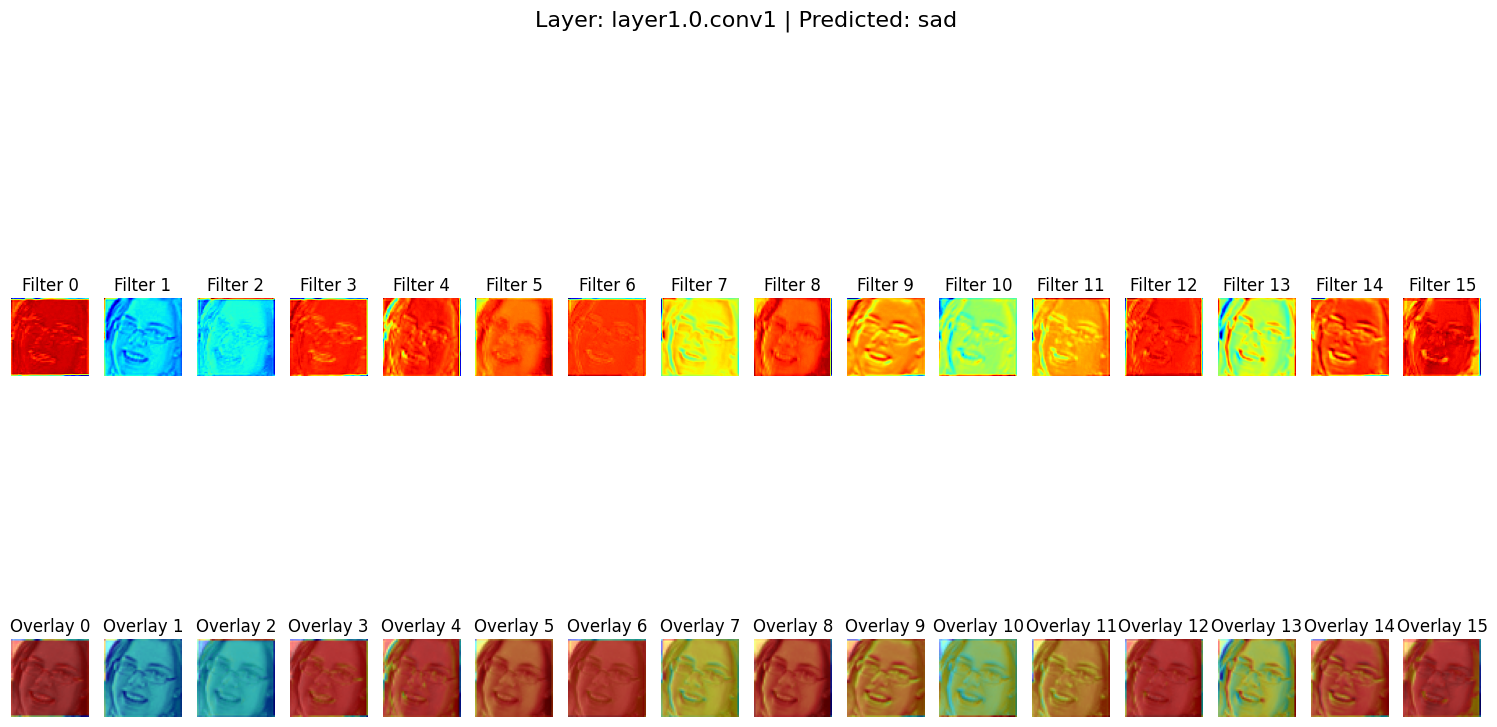

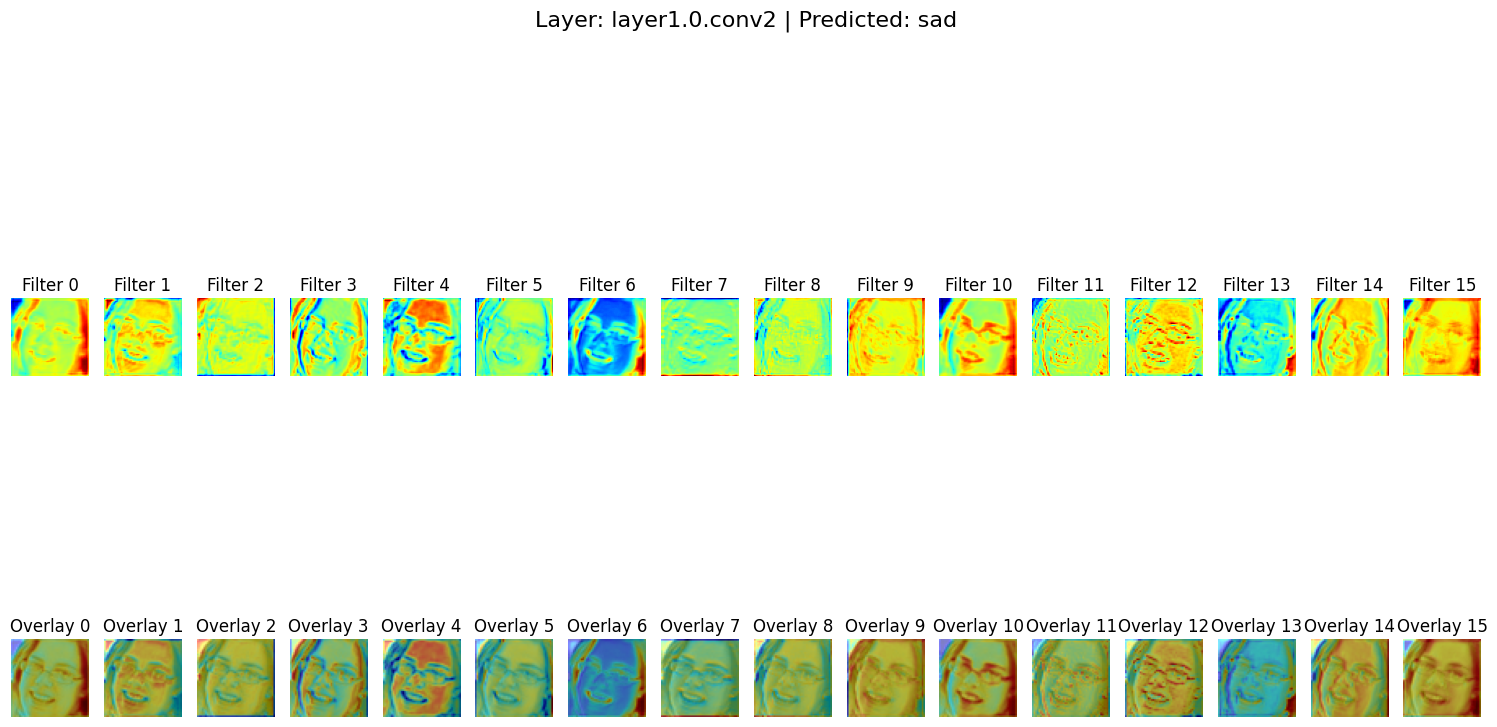

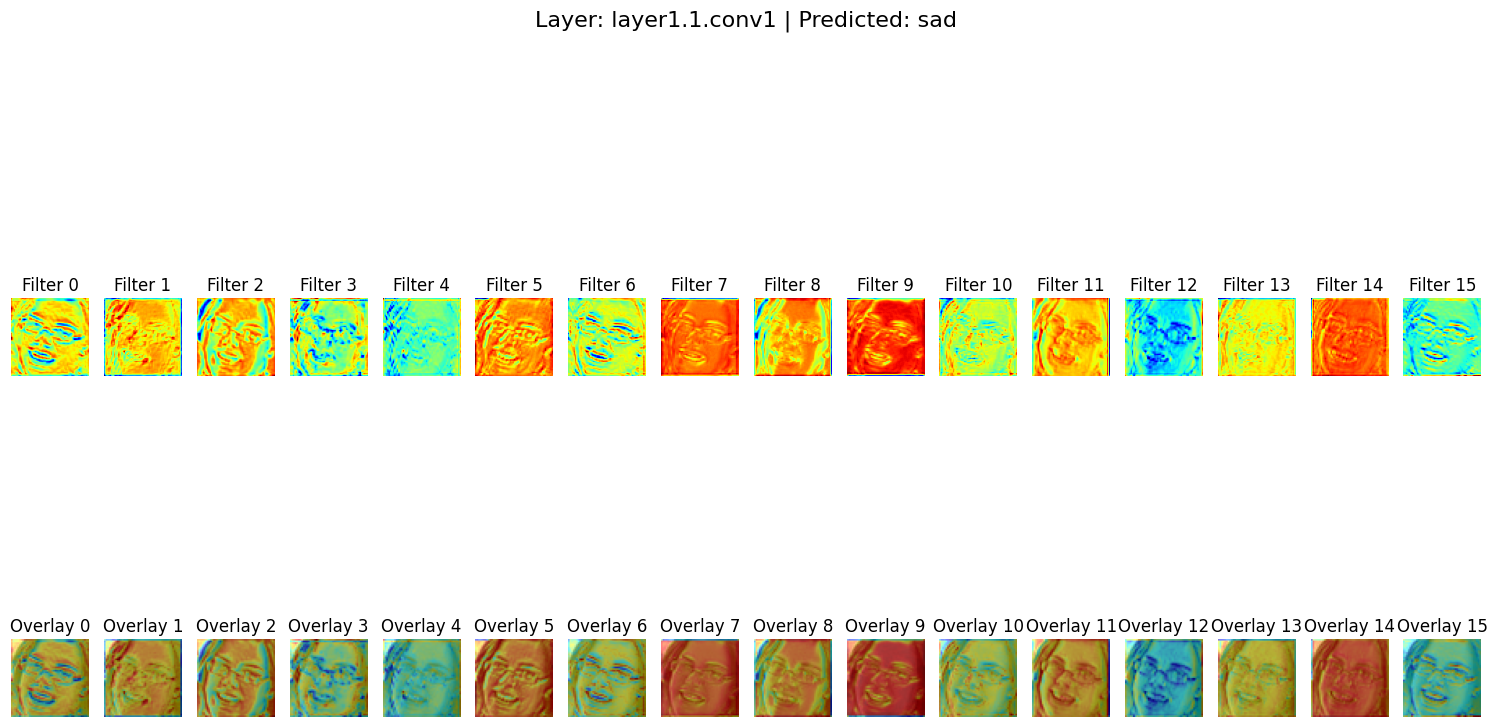

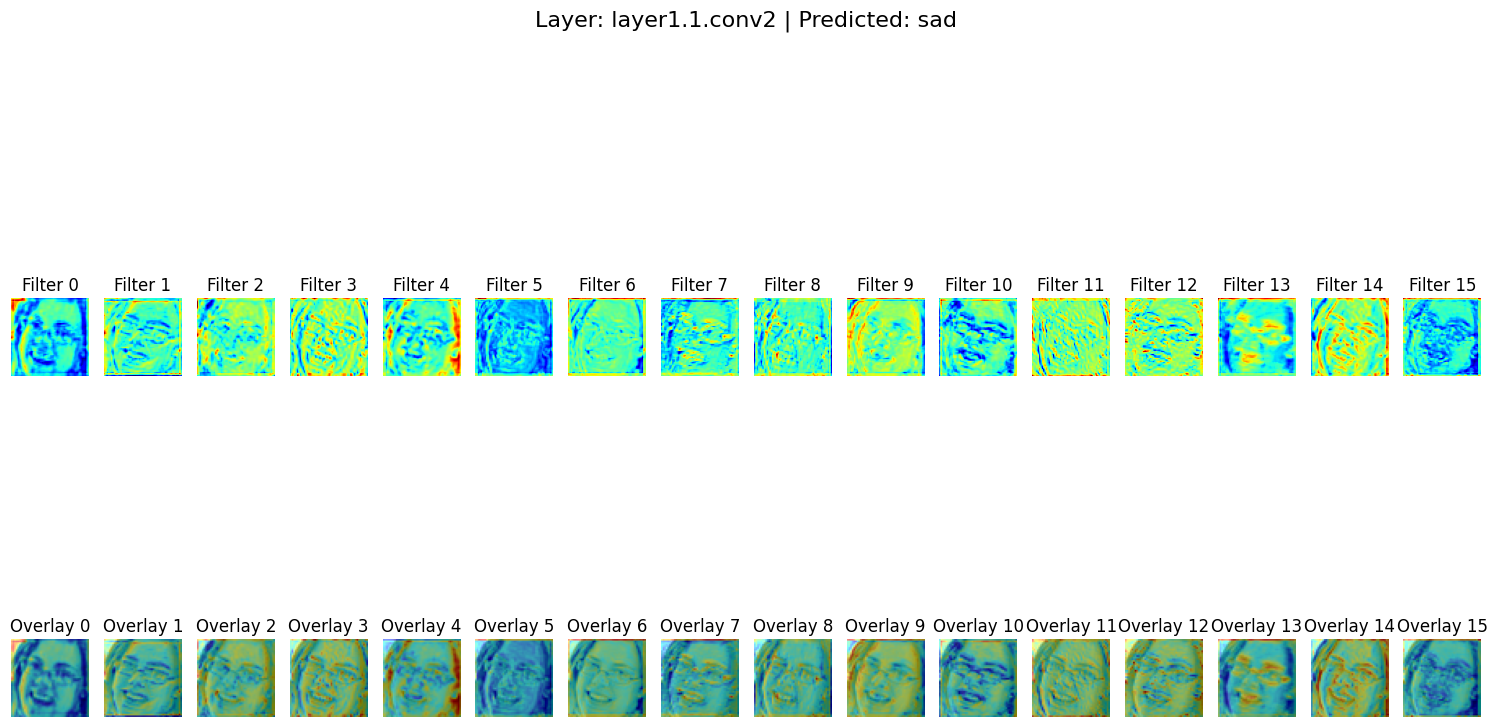

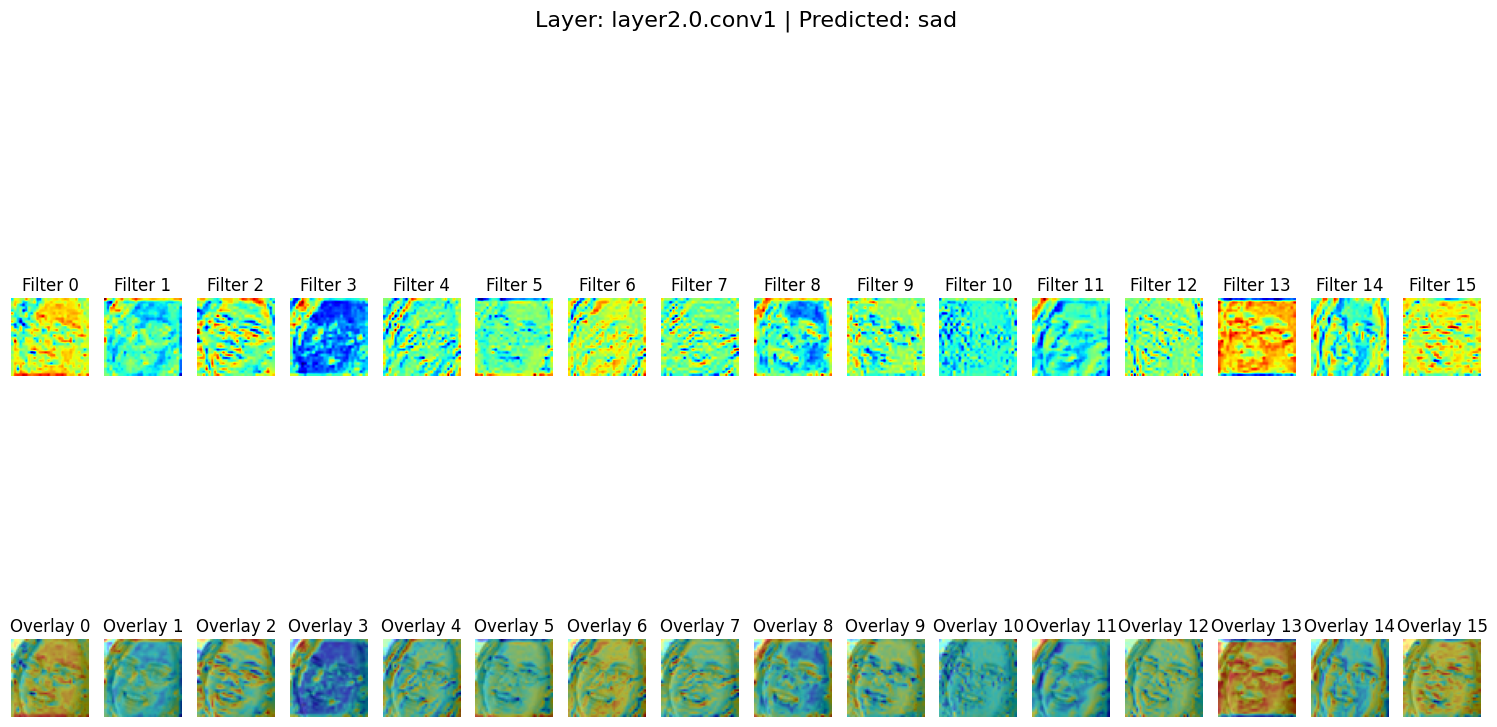

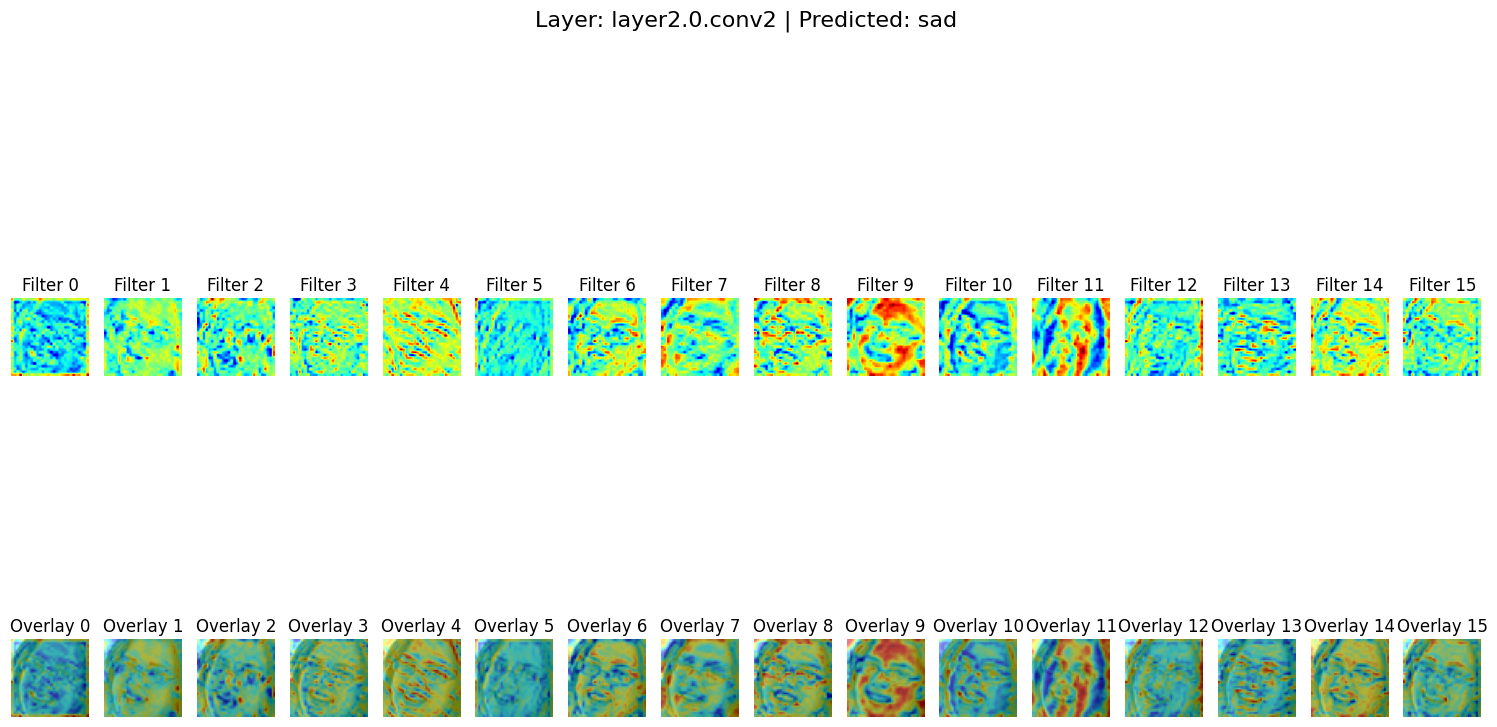

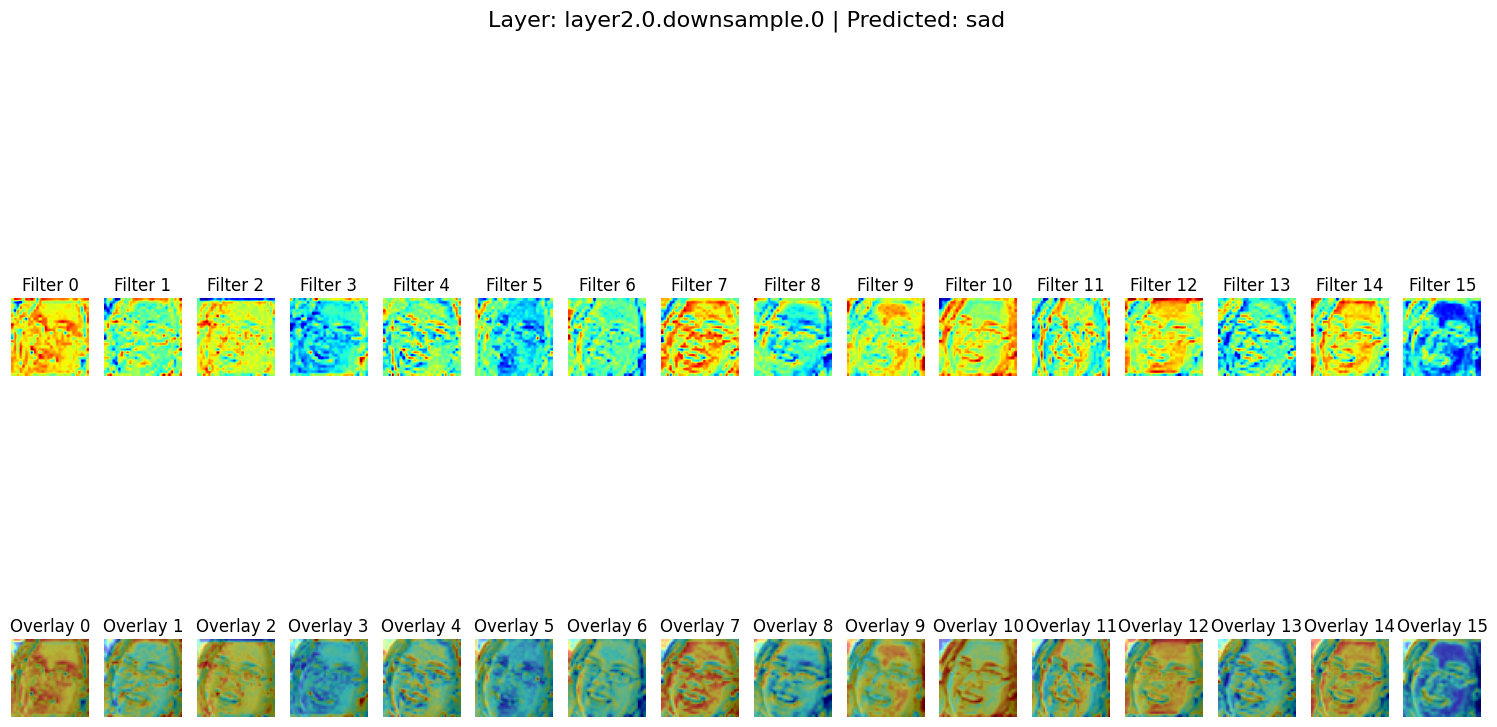

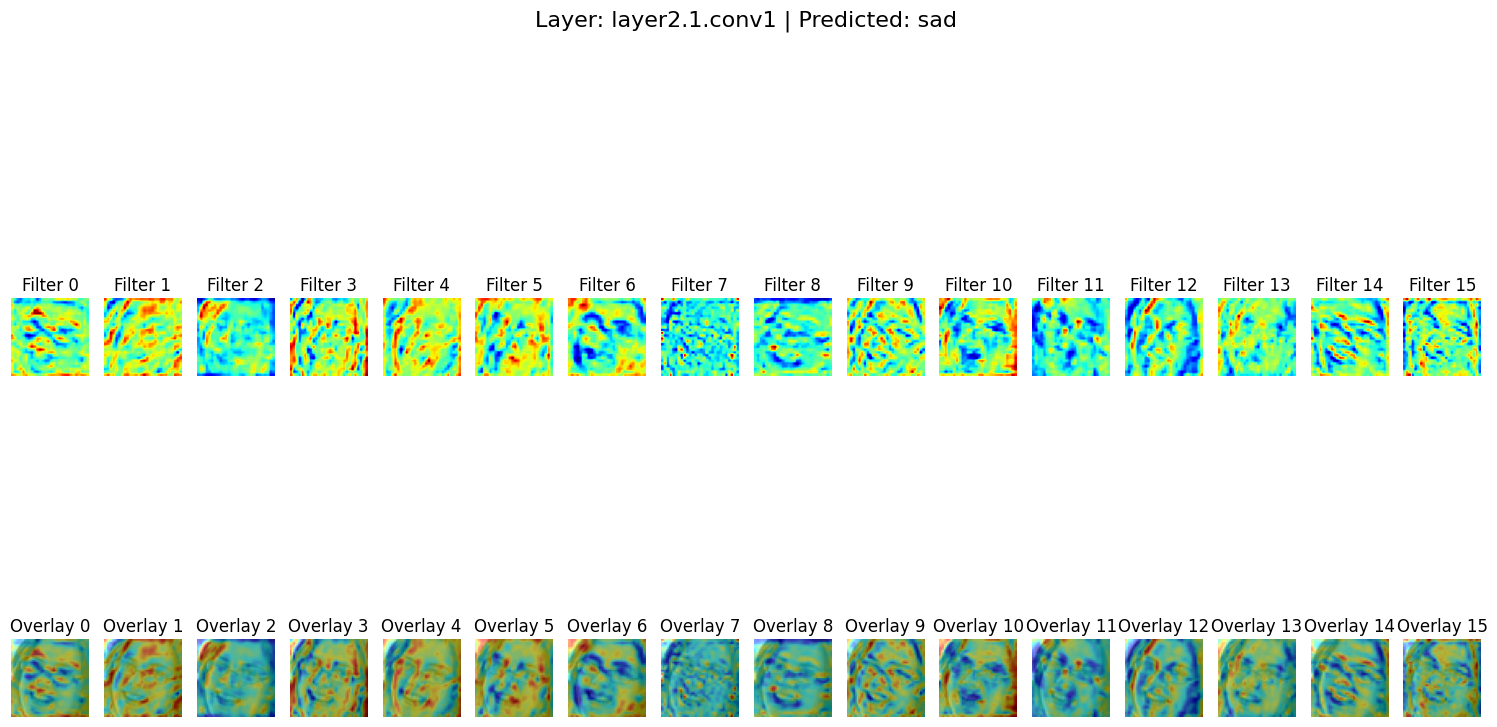

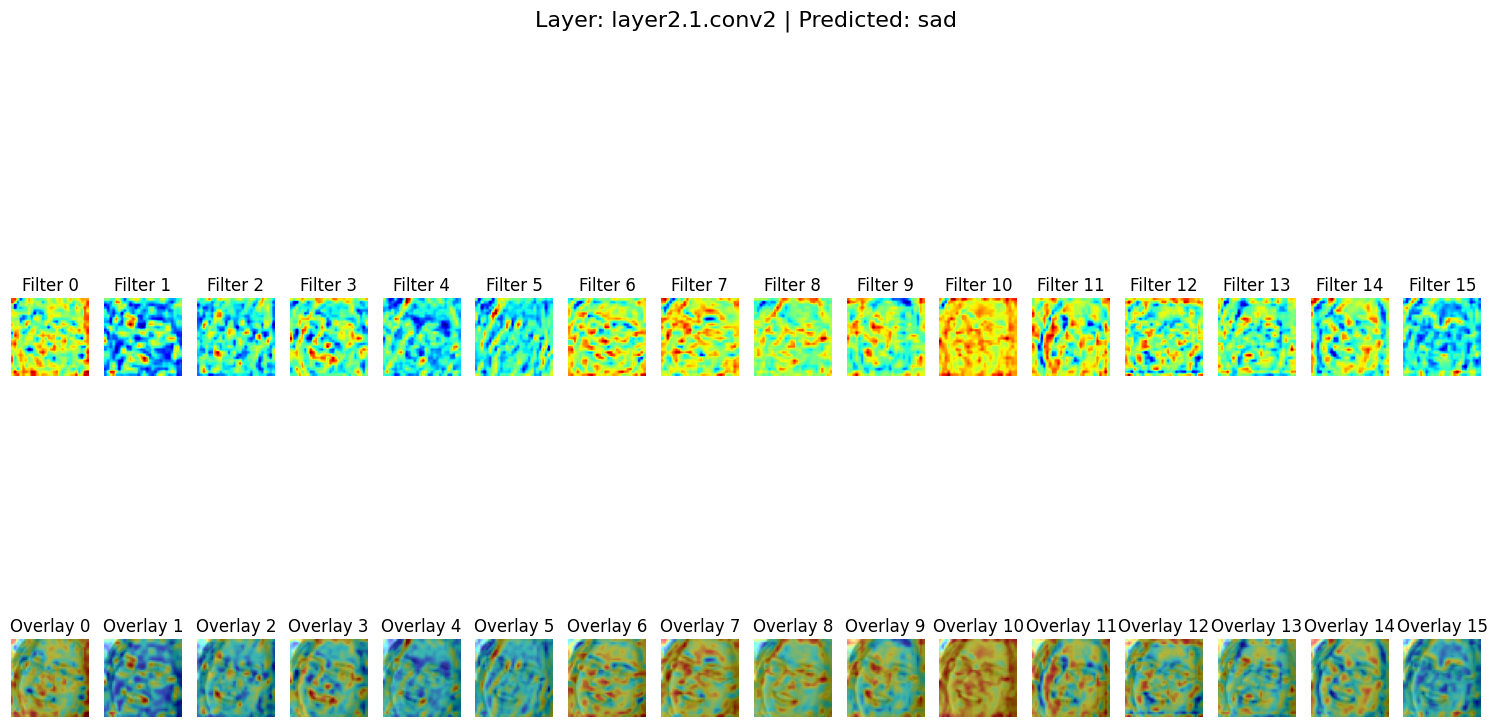

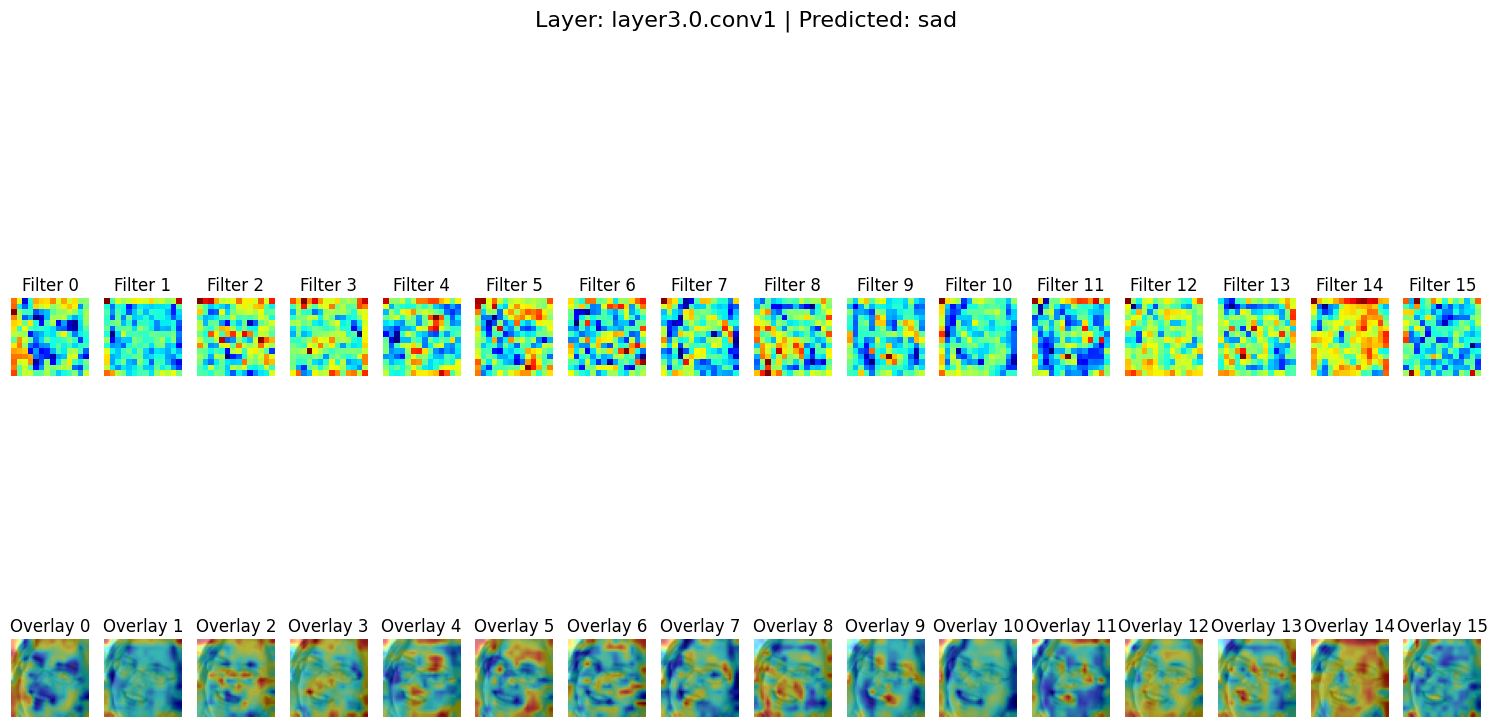

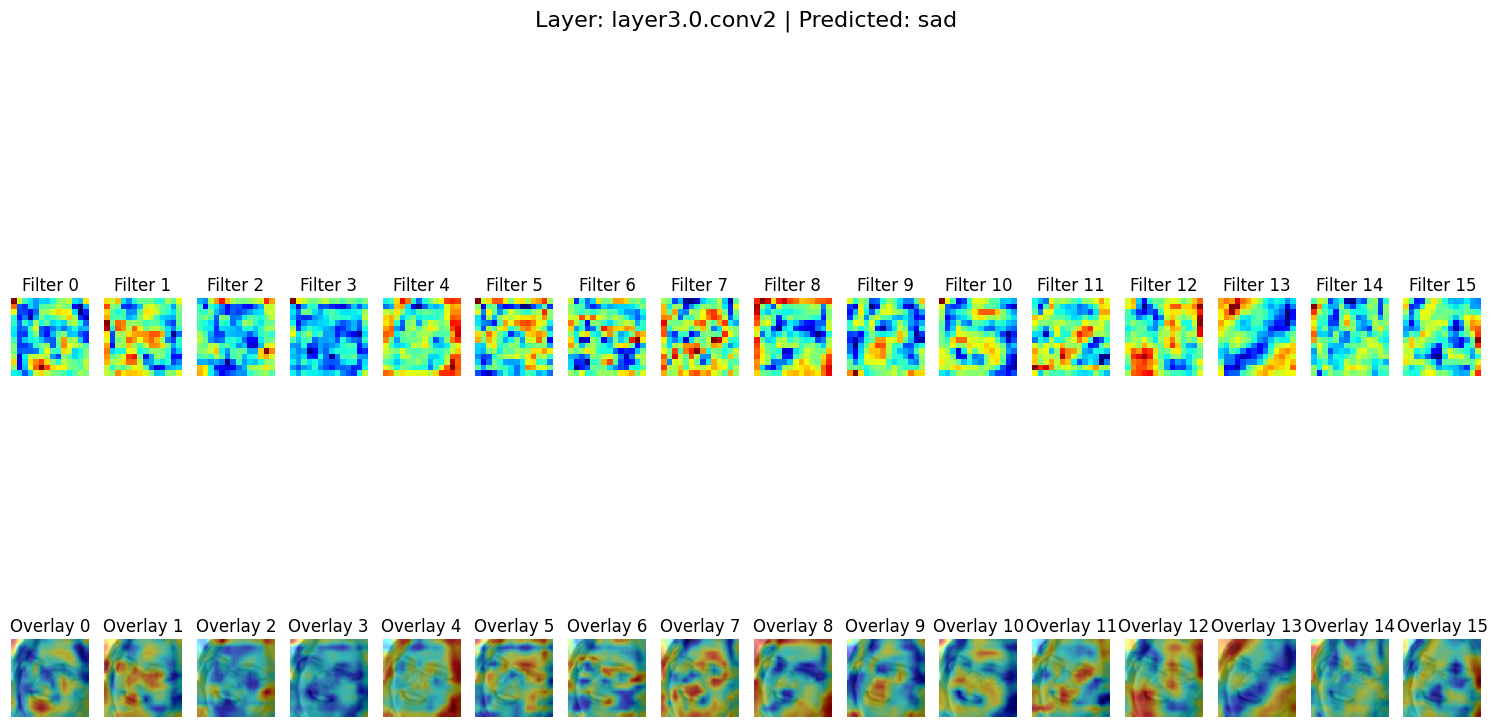

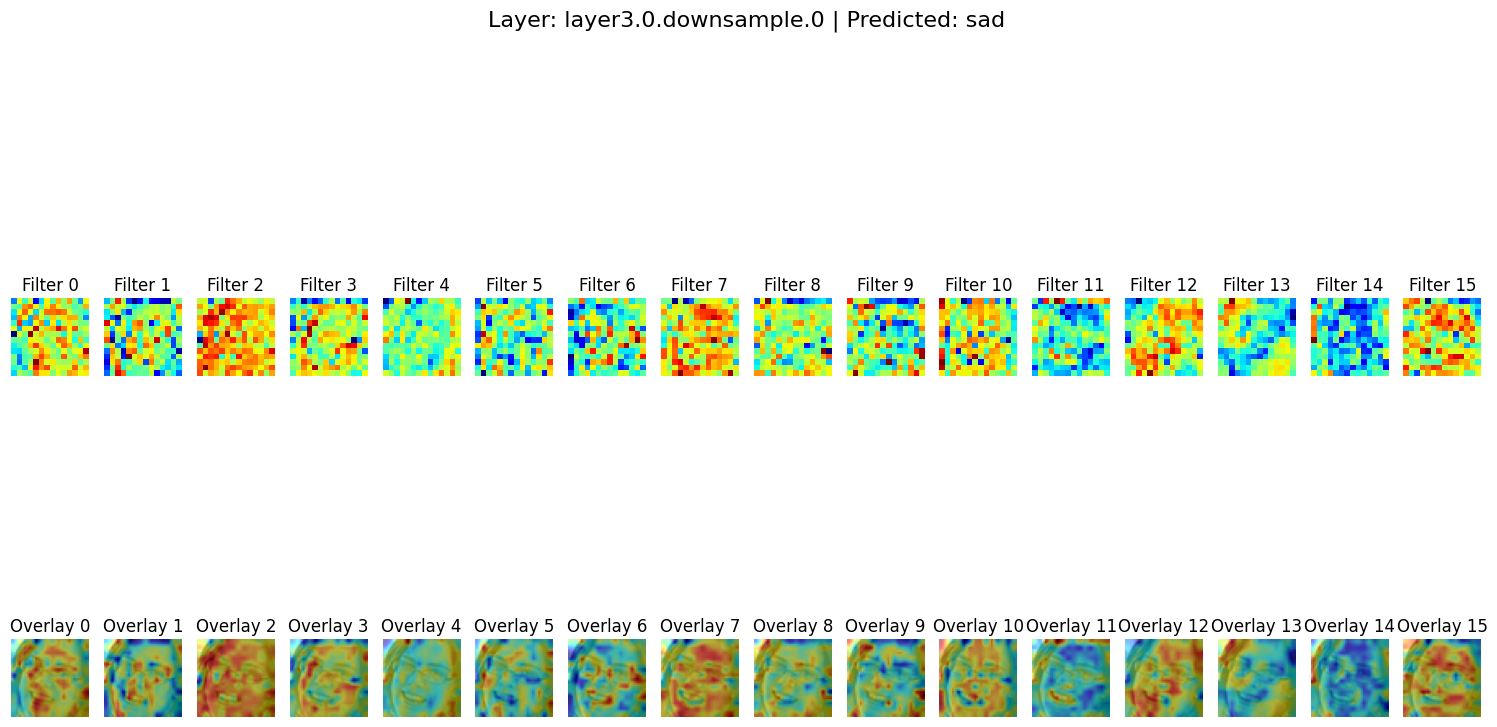

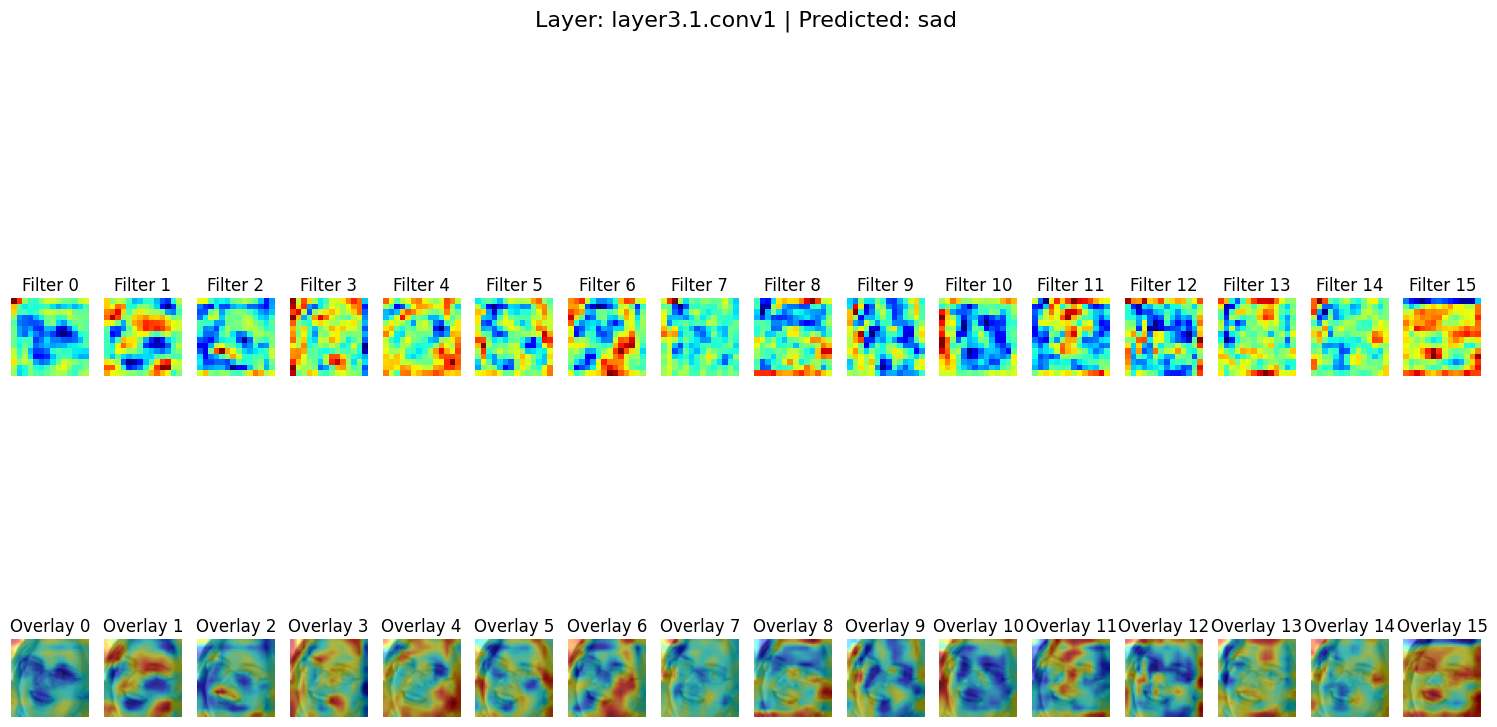

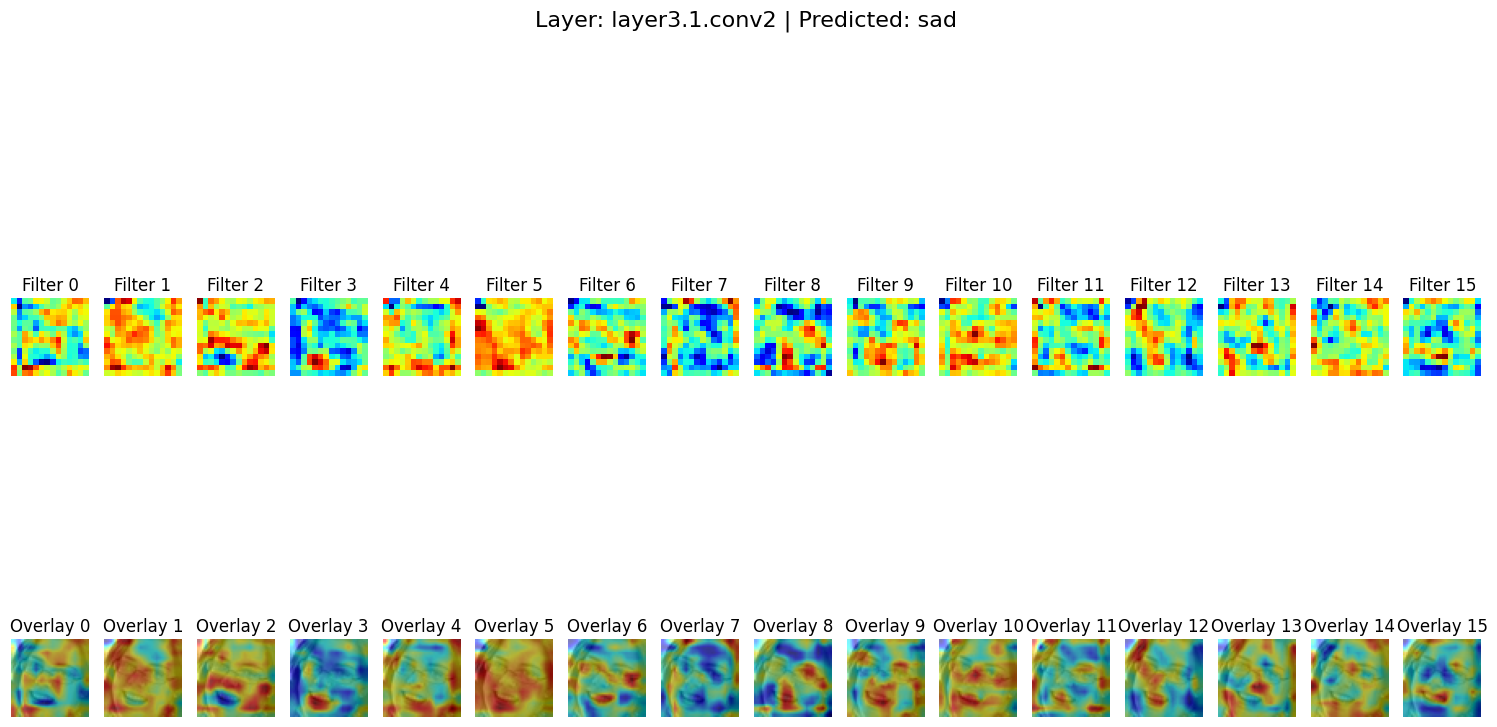

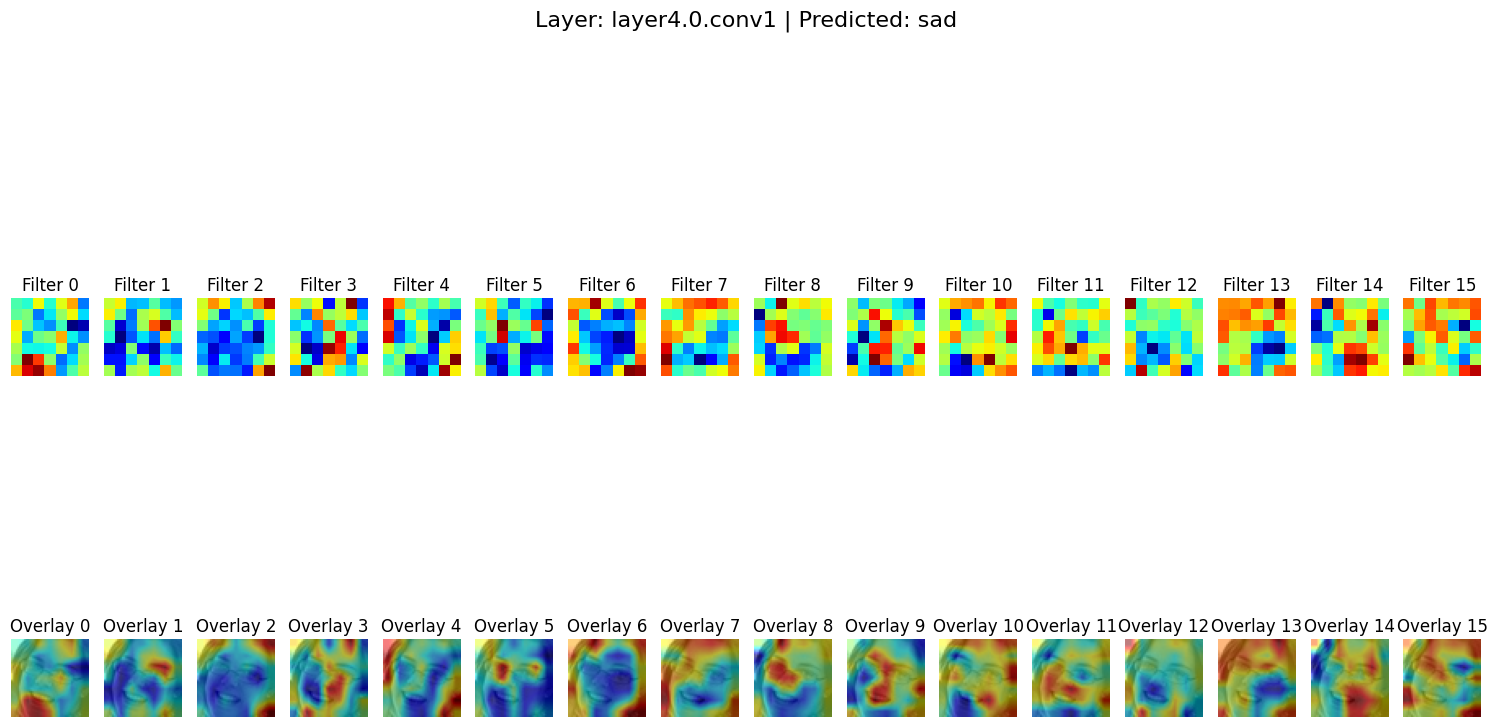

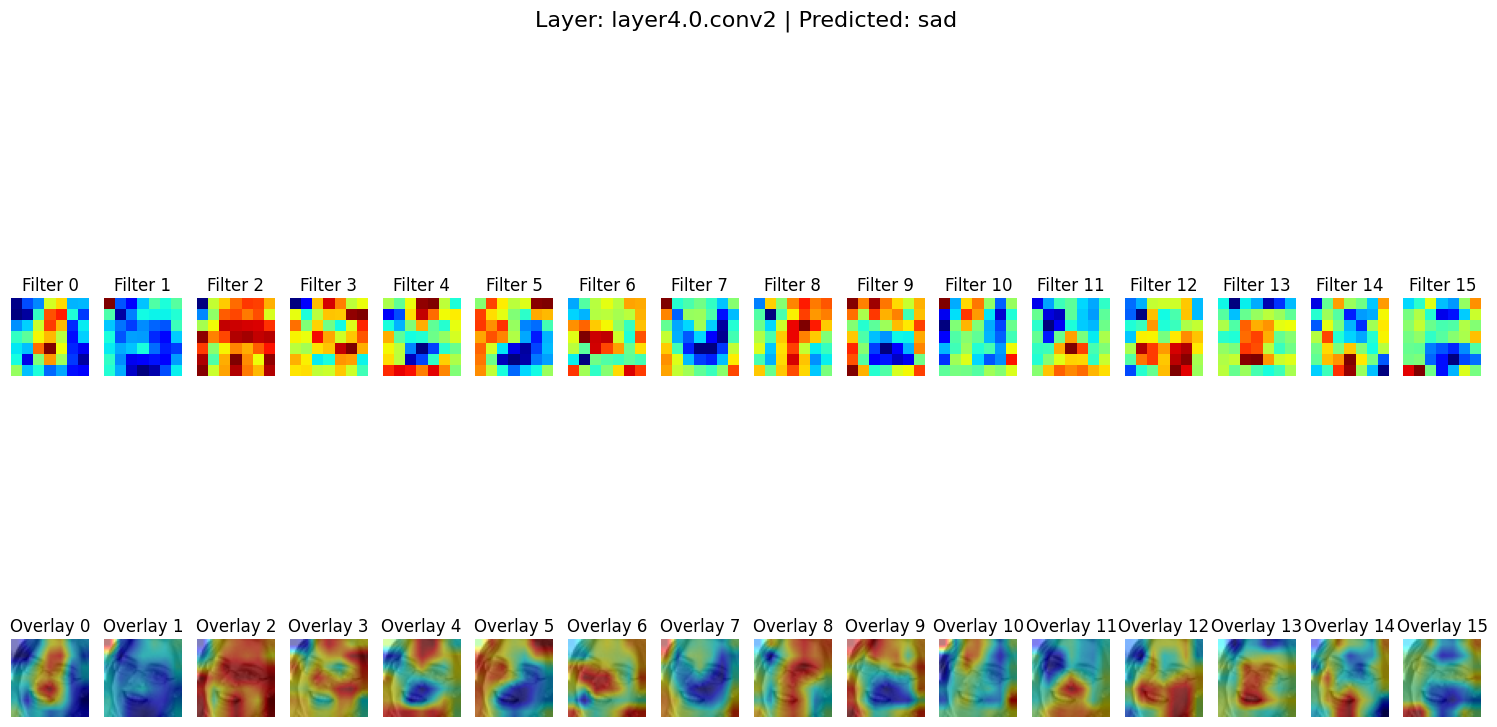

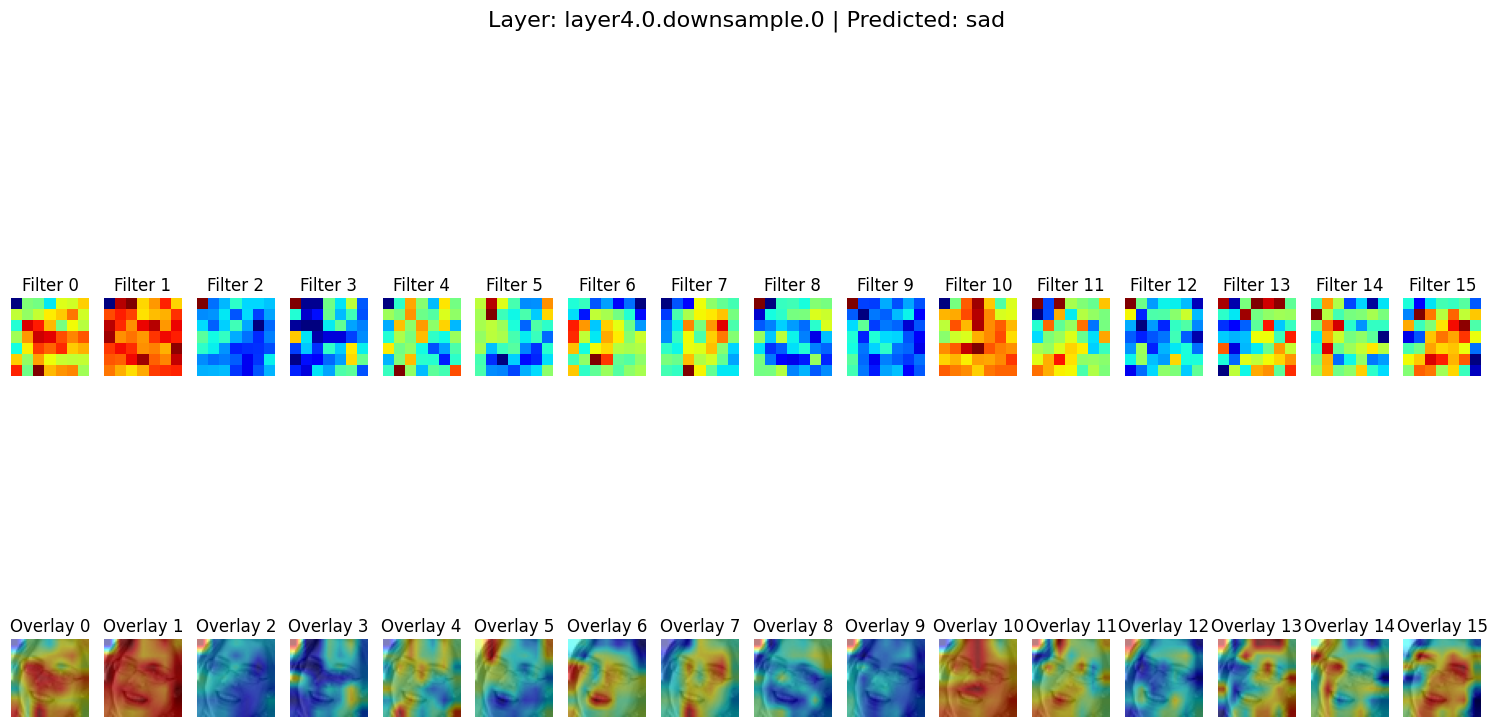

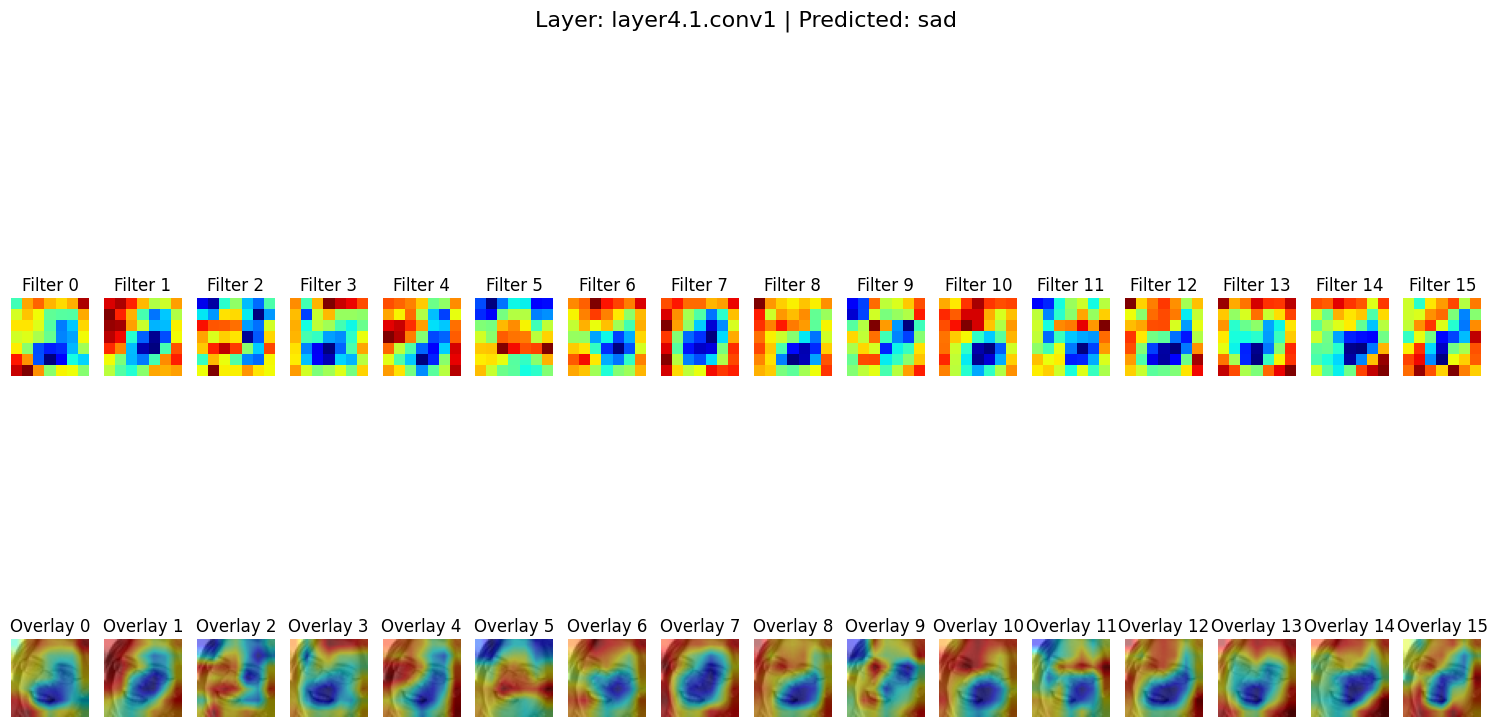

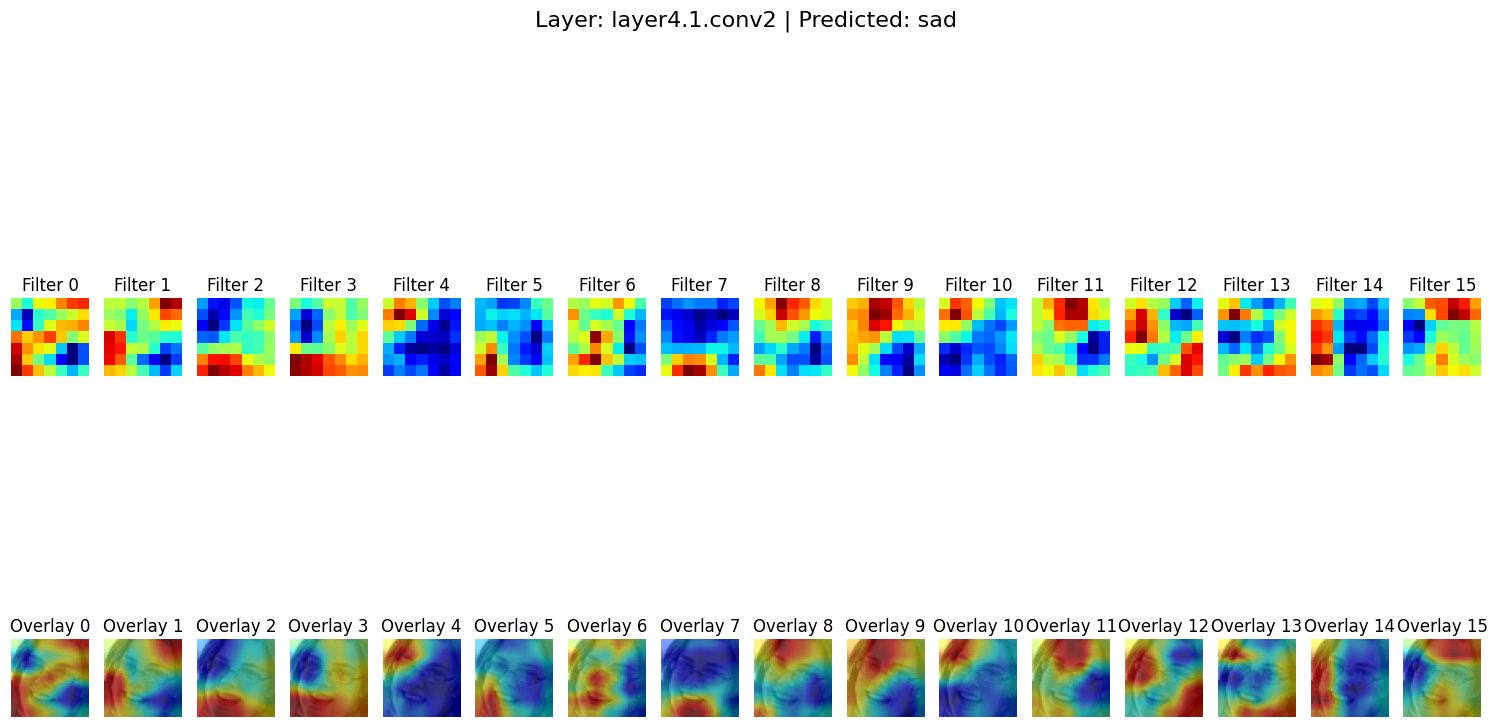

Predicted emotion: sad


In [4]:
# Visualize activation maps
if os.path.exists(img_path):
    predicted_class = visualizer.visualize_activation_maps(img_path)
    print(f"Predicted emotion: {visualizer.emotion_labels[predicted_class]}")

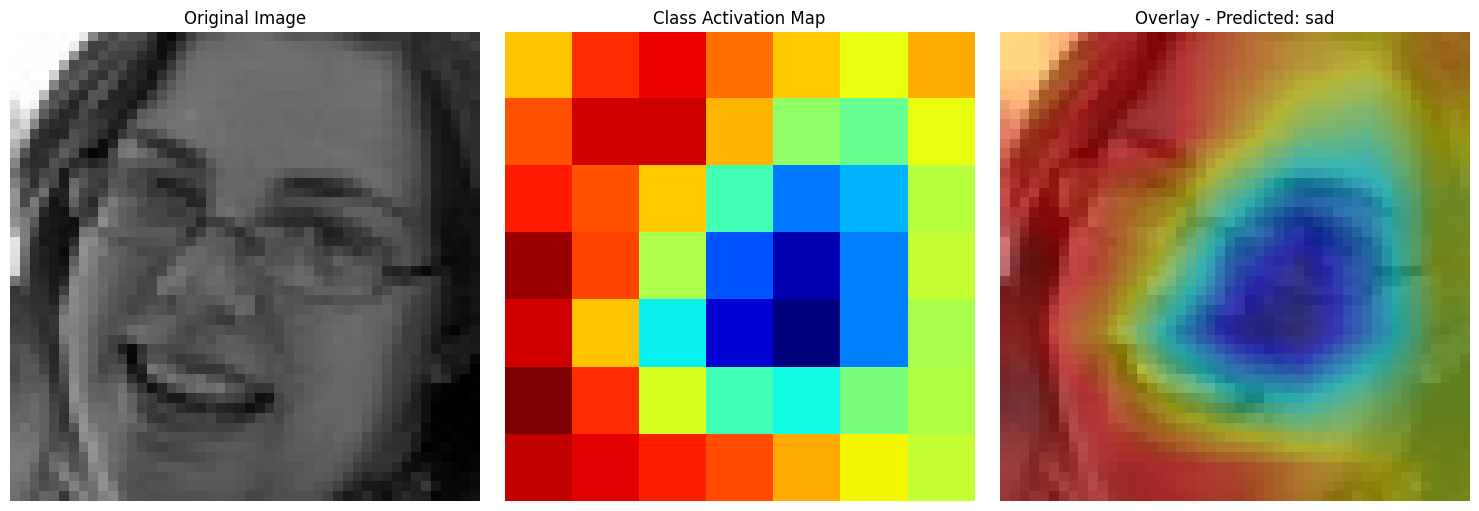

Predicted emotion: sad


In [5]:
# Visualize class activation map
if os.path.exists(img_path):
    predicted_class, overlay = visualizer.visualize_class_activation_map(img_path)
    print(f"Predicted emotion: {visualizer.emotion_labels[predicted_class]}")